# Ordinal Encoding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\Avniiii\Machine_Learning_class\datasets\review.xlsx")

In [3]:
df

,age,gender,review,education,purchase
0,18,male,good,mca,yes
1,20,male,v good,mca,no
2,22,female,ex,bca,no
3,24,male,ex,bca,yes
4,21,female,good,bca,yes


In [4]:
df.columns

Index(['age', 'gender', 'review', 'education', 'purchase'], dtype='object')

In [5]:
X = df[['review', 'education',]]

In [6]:
X

,review,education
0,good,mca
1,v good,mca
2,ex,bca
3,ex,bca
4,good,bca


In [7]:
Y = df['purchase']

In [8]:
Y

0    yes
1     no
2     no
3    yes
4    yes
Name: purchase, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
X_train

,review,education
4,good,bca
0,good,mca
3,ex,bca


In [13]:
oe = OrdinalEncoder(categories=[['ex','v good','good'],['mca','bca']])

In [14]:
oe

OrdinalEncoder(categories=[['ex', 'v good', 'good'], ['mca', 'bca']])

In [15]:
oe.fit(X_train)

OrdinalEncoder(categories=[['ex', 'v good', 'good'], ['mca', 'bca']])

In [16]:
trans = oe.transform(X_train)

In [17]:
trans

array([[2., 1.],
       [2., 0.],
       [0., 1.]])

In [18]:
X_train

,review,education
4,good,bca
0,good,mca
3,ex,bca


# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
le.fit(Y_train)

LabelEncoder()

In [22]:
le.transform(Y_train)

array([0, 0, 0])

# Nominal Encoding : One Hot Encoding

In [23]:
df = pd.read_csv(r"C:\Users\Avniiii\Machine_Learning_class\datasets\car_dataset\CAR DETAILS FROM CAR DEKHO.csv")

In [24]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [25]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [26]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [27]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [28]:
df['name'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [29]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [30]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [31]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [32]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [33]:
pd.get_dummies(df,columns=['name', 'fuel', 'seller_type',
       'transmission', 'owner'])

,year,selling_price,km_driven,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4336,2014,409999,80000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4337,2009,110000,83000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4338,2016,865000,90000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


# k-1 One Hot Encoding

In [34]:
pd.get_dummies(df,columns=['name', 'fuel', 'seller_type',
       'transmission', 'owner'],drop_first=True)

,year,selling_price,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4336,2014,409999,80000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4337,2009,110000,83000,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
4338,2016,865000,90000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [35]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# SKlern one hot encoding

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df[['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [38]:
Y = df['selling_price']

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=51)

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [42]:
ohe

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse_output=False)

In [43]:
x_train_tran = ohe.fit_transform(X_train[['name', 'fuel', 'seller_type','transmission', 'owner']])

In [44]:
x_train_tran

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
x_test_trans = ohe.fit_transform(X_test[['name', 'fuel', 'seller_type','transmission', 'owner']])

In [46]:
x_test_trans

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

In [47]:
x_train_tran.shape

(3038, 1255)

In [48]:
X.shape

(4340, 7)

In [49]:
x_test_trans.shape

(1302, 747)

# New DataSet

In [50]:
df = pd.read_excel(r"C:\Users\Avniiii\Machine_Learning_class\datasets\stu.xlsx")

In [51]:
df

,name,sex,marks,age,grade,relult
0,avneesh,m,90,25,A,pass
1,shivani,f,80,23,A,pass
2,rahul,m,70,24,B,pass
3,mohit,m,50,26,C,fail
4,sanju,m,50,22,C,fail
5,sanjana,f,60,21,B,pass
6,rachana,f,60,22,B,pass
7,sonia,f,45,24,C,fail
8,divya,f,12,25,C,fail
9,chamoli,m,16,26,C,fail


In [52]:
df.isnull().sum()

name      0
sex       0
marks     0
age       0
grade     0
relult    0
dtype: int64

In [53]:
df.columns

Index(['name', 'sex', 'marks', 'age', 'grade', 'relult'], dtype='object')

In [54]:
X = df[['name', 'sex', 'marks', 'age', 'grade']]

In [55]:
X

,name,sex,marks,age,grade
0,avneesh,m,90,25,A
1,shivani,f,80,23,A
2,rahul,m,70,24,B
3,mohit,m,50,26,C
4,sanju,m,50,22,C
5,sanjana,f,60,21,B
6,rachana,f,60,22,B
7,sonia,f,45,24,C
8,divya,f,12,25,C
9,chamoli,m,16,26,C


In [56]:
Y = df['relult']

In [57]:
Y

0     pass
1     pass
2     pass
3     fail
4     fail
5     pass
6     pass
7     fail
8     fail
9     fail
10    pass
Name: relult, dtype: object

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [60]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder

# Ordinal Encoder

In [61]:
oe = OrdinalEncoder()

In [62]:
grade_train_transform = oe.fit_transform(X_train[['grade']])

In [63]:
grade_train_transform

array([[0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.]])

In [64]:
grade_test_transform = oe.fit_transform(X_test[['grade']])

In [65]:
grade_test_transform

array([[0.],
       [2.],
       [1.],
       [2.]])

# Label Encoder

In [66]:
lbe = LabelEncoder()

In [67]:
Y_train_transform = lbe.fit_transform(Y_train)

In [68]:
Y_train_transform

array([1, 1, 1, 0, 0, 1, 0])

In [69]:
Y_test_transform = lbe.fit_transform(Y_test)

In [70]:
Y_test_transform

array([1, 0, 1, 0])

# One hot Encoder

In [71]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [72]:
X_train_sex_transform = ohe.fit_transform(X_train[['sex']])

In [73]:
X_train_sex_transform

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [74]:
X_test_sex_transform = ohe.fit_transform(X_test[['sex']])

In [75]:
X_test_sex_transform

array([[0],
       [0],
       [1],
       [0]])

# New Dataset

In [76]:
df = pd.read_csv(r"C:\Users\Avniiii\Machine_Learning_class\datasets\Bengaluru_House_Data.csv")

In [77]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [78]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [79]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

C:\Users\Avniiii\AppData\Local\Temp\ipykernel_13876\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

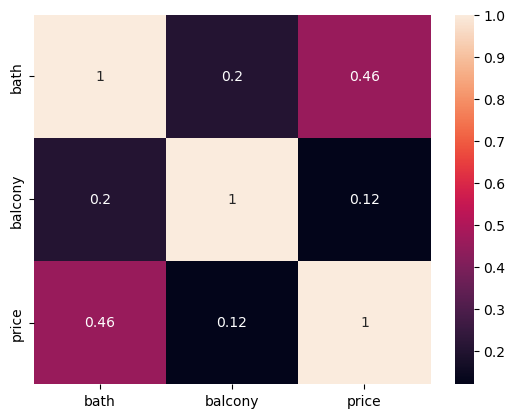

In [80]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

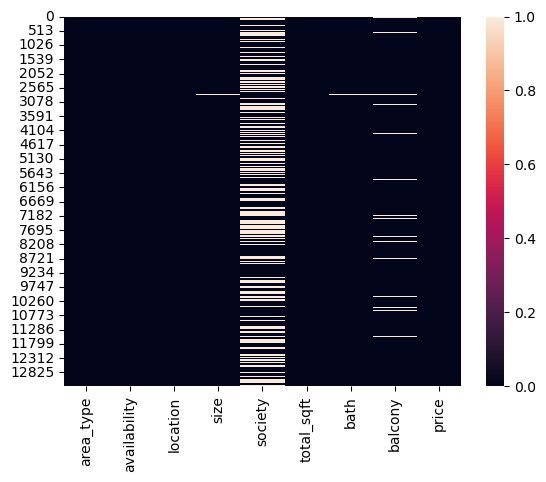

In [81]:
sns.heatmap(df.isnull())

In [82]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [83]:
# Area Type NUll Value Anan=lysis
df['area_type'].isnull().sum()

0

In [84]:
df['area_type'].nunique()

4

In [85]:
# Availability Null Value Check
df['availability'].isnull().sum()

0

In [86]:
df['availability'].nunique()

81

In [87]:
# Drop availability Column
df1 = df.drop('availability',axis=1)

In [88]:
df1.columns

Index(['area_type', 'location', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [89]:
# location Null value check
df1['location'].isnull().sum()

1

In [90]:
df1['location'].nunique()

1305

In [91]:
# Drop location

df1 = df1.drop('location',axis=1)

In [92]:
df1.columns

Index(['area_type', 'size', 'society', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [93]:
# Null value check in size
df1['size'].isnull().sum()

16

In [94]:
df1['size'].nunique()

31

In [95]:
df1 = df1.drop('size',axis=1)

In [96]:
df1.columns

Index(['area_type', 'society', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [97]:
# Null Value Check in society
df1['society'].isnull().sum()

5502

In [98]:
df1['society'].nunique()

2688

In [99]:
# Drop society

df2 = df1.drop('society',axis=1)

In [100]:
# Null Value check in total_sqrt
df2['total_sqft'].isnull().sum()

0

In [101]:
# Null value in bath
df2['bath'].isnull().sum()

73

In [102]:
# Fill null value in bath
df2['bath'].fillna(df2['bath'].mode()[0],inplace=True)

In [103]:
# Fill Null Value in Balcony
df2['balcony'].fillna(df2['balcony'].mode()[0],inplace=True)

In [104]:
df2

,area_type,total_sqft,bath,balcony,price
0,Super built-up Area,1056,2.0,1.0,39.07
1,Plot Area,2600,5.0,3.0,120.00
2,Built-up Area,1440,2.0,3.0,62.00
3,Super built-up Area,1521,3.0,1.0,95.00
4,Super built-up Area,1200,2.0,1.0,51.00
...,...,...,...,...,...
13315,Built-up Area,3453,4.0,0.0,231.00
13316,Super built-up Area,3600,5.0,2.0,400.00
13317,Built-up Area,1141,2.0,1.0,60.00
13318,Super built-up Area,4689,4.0,1.0,488.00


In [105]:
df2.isnull().sum()

area_type     0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [106]:
df2.columns

Index(['area_type', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

# Fill Encoded Data In DataFrame 

In [107]:
from sklearn.preprocessing import OneHotEncoder


In [108]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [109]:
area_t = pd.DataFrame(ohe.fit_transform(df2[['area_type']]))

In [110]:
new_df = pd.concat([df2,area_t],axis=1)

In [111]:
new_df

,area_type,total_sqft,bath,balcony,price,0,1,2
0,Super built-up Area,1056,2.0,1.0,39.07,0,0,1
1,Plot Area,2600,5.0,3.0,120.00,0,1,0
2,Built-up Area,1440,2.0,3.0,62.00,0,0,0
3,Super built-up Area,1521,3.0,1.0,95.00,0,0,1
4,Super built-up Area,1200,2.0,1.0,51.00,0,0,1
...,...,...,...,...,...,...,...,...
13315,Built-up Area,3453,4.0,0.0,231.00,0,0,0
13316,Super built-up Area,3600,5.0,2.0,400.00,0,0,1
13317,Built-up Area,1141,2.0,1.0,60.00,0,0,0
13318,Super built-up Area,4689,4.0,1.0,488.00,0,0,1


In [112]:
for i in range(new_df.area_type.nunique()-1):
    new_df.rename(columns={i:sorted(new_df.area_type.unique())[i+1]},inplace=True)

In [113]:
new_df

,area_type,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1056,2.0,1.0,39.07,0,0,1
1,Plot Area,2600,5.0,3.0,120.00,0,1,0
2,Built-up Area,1440,2.0,3.0,62.00,0,0,0
3,Super built-up Area,1521,3.0,1.0,95.00,0,0,1
4,Super built-up Area,1200,2.0,1.0,51.00,0,0,1
...,...,...,...,...,...,...,...,...
13315,Built-up Area,3453,4.0,0.0,231.00,0,0,0
13316,Super built-up Area,3600,5.0,2.0,400.00,0,0,1
13317,Built-up Area,1141,2.0,1.0,60.00,0,0,0
13318,Super built-up Area,4689,4.0,1.0,488.00,0,0,1


In [114]:
new_df1 = new_df.drop('area_type',axis=1)

In [115]:
new_df1

,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,1056,2.0,1.0,39.07,0,0,1
1,2600,5.0,3.0,120.00,0,1,0
2,1440,2.0,3.0,62.00,0,0,0
3,1521,3.0,1.0,95.00,0,0,1
4,1200,2.0,1.0,51.00,0,0,1
...,...,...,...,...,...,...,...
13315,3453,4.0,0.0,231.00,0,0,0
13316,3600,5.0,2.0,400.00,0,0,1
13317,1141,2.0,1.0,60.00,0,0,0
13318,4689,4.0,1.0,488.00,0,0,1


# New DataSet

In [116]:
df = sns.load_dataset('titanic')

In [117]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [118]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [119]:
df.drop(['age','deck'],axis=1,inplace=True)

In [120]:
df

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [121]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [122]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [123]:
df.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [124]:
df

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [125]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

In [126]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [127]:
df.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [128]:
df['gender']=ohe.fit_transform(df[['sex']])

In [129]:
who_t = pd.DataFrame(ohe.fit_transform(df[['who']]))

In [130]:
who_t

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,1
889,1,0


In [131]:
df1 = pd.concat([df,who_t],axis=1)

In [132]:
df1

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,gender,0,1
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,1,0
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,1
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True,1,1,0
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0,0,1
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0,0,1
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,1,1,0


In [133]:
for i in range (df1['who'].nunique()-1):
    df1.rename(columns={i:df1['who'].unique()[i+1]},inplace=True)

In [134]:
df1

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,gender,woman,child
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,1,0
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,1
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True,1,1,0
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0,0,1
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0,0,1
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,1,1,0


In [135]:
embarked_t = pd.DataFrame(ohe.fit_transform(df[['embarked']]))

In [136]:
embarked_t

,0,1
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [137]:
df2 = pd.concat([df1,embarked_t],axis=1)

In [138]:
df2

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,gender,woman,child,0,1
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,1,0,0,1
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,1,0,0
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,0,1
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,0,1
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True,1,1,0,0,1
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0,0,1,0,1
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0,0,1,0,1
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,1,1,0,0,0


In [139]:
for i in range(df2['embarked'].nunique()-1):
    df2.rename(columns={i:df2['embarked'].unique()[i+1]},inplace=True)
    


In [141]:
df2

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,gender,woman,child,C,Q
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,1,0,0,1
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,1,0,0
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,0,1
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,0,1
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True,1,1,0,0,1
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0,0,1,0,1
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0,0,1,0,1
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,1,1,0,0,0


In [146]:
embark_town_t = pd.DataFrame(ohe.fit_transform(df[['embark_town']]))

In [147]:
embark_town_t

,0,1
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [150]:
df3 = pd.concat([df2,embark_town_t],axis=1)

In [151]:
df3

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,gender,woman,child,C,Q,0,1
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,1,0,0,1,0,1
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,1,0,0,0,0
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,0,1,0,1
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,0,1,0,1
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True,1,1,0,0,1,0,1
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0,0,1,0,1,0,1
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0,0,1,0,1,0,1
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,1,1,0,0,0,0,0


In [152]:
for i in range(df3['embark_town'].nunique()-1):
    df3.rename(columns={i:df['embark_town'].unique()[i+1]},inplace=True)

In [153]:
df3

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,gender,woman,child,C,Q,Cherbourg,Queenstown
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,1,0,0,1,0,1
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,1,0,0,0,0
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,0,1,0,1
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,0,1,0,1
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True,1,1,0,0,1,0,1
887,1,1,female,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0,0,1,0,1,0,1
888,0,3,female,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0,0,1,0,1,0,1
889,1,1,male,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,1,1,0,0,0,0,0


In [161]:
oe = OrdinalEncoder(categories=[['First','Second','Third']],dtype=np.int32)

In [167]:
df3['class_'] = pd.DataFrame(oe.fit_transform(df3[['class']]))

In [168]:
df3

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,...,alive,alone,gender,woman,child,C,Q,Cherbourg,Queenstown,class_
0,0,3,male,1,0,7.2500,S,Third,man,True,...,no,False,1,1,0,0,1,0,1,2
1,1,1,female,1,0,71.2833,C,First,woman,False,...,yes,False,0,0,1,0,0,0,0,0
2,1,3,female,0,0,7.9250,S,Third,woman,False,...,yes,True,0,0,1,0,1,0,1,2
3,1,1,female,1,0,53.1000,S,First,woman,False,...,yes,False,0,0,1,0,1,0,1,0
4,0,3,male,0,0,8.0500,S,Third,man,True,...,no,True,1,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,...,no,True,1,1,0,0,1,0,1,1
887,1,1,female,0,0,30.0000,S,First,woman,False,...,yes,True,0,0,1,0,1,0,1,0
888,0,3,female,1,2,23.4500,S,Third,woman,False,...,no,False,0,0,1,0,1,0,1,2
889,1,1,male,0,0,30.0000,C,First,man,True,...,yes,True,1,1,0,0,0,0,0,0


In [180]:
oe = OrdinalEncoder(categories=[[False,True]],dtype=np.int32)

In [182]:
df3['adult_male_']=oe.fit_transform(df3[['adult_male']])

In [185]:
df3['alone_']=oe.fit_transform(df3[['alone']])

In [187]:
df3.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'gender',
       'woman', 'child', 'C', 'Q', 'Cherbourg', 'Queenstown', 'class_',
       'adult_male_', 'alone_'],
      dtype='object')

In [191]:
df3.drop(['sex','embarked','class','who','adult_male','embark_town','alone'],axis=1,inplace=True)

In [192]:
df3

,survived,pclass,sibsp,parch,fare,alive,gender,woman,child,C,Q,Cherbourg,Queenstown,class_,adult_male_,alone_
0,0,3,1,0,7.2500,no,1,1,0,0,1,0,1,2,1,0
1,1,1,1,0,71.2833,yes,0,0,1,0,0,0,0,0,0,0
2,1,3,0,0,7.9250,yes,0,0,1,0,1,0,1,2,0,1
3,1,1,1,0,53.1000,yes,0,0,1,0,1,0,1,0,0,0
4,0,3,0,0,8.0500,no,1,1,0,0,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,no,1,1,0,0,1,0,1,1,1,1
887,1,1,0,0,30.0000,yes,0,0,1,0,1,0,1,0,0,1
888,0,3,1,2,23.4500,no,0,0,1,0,1,0,1,2,0,0
889,1,1,0,0,30.0000,yes,1,1,0,0,0,0,0,0,1,1


In [193]:
from sklearn.model_selection import train_test_split

In [194]:
df3.columns

Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alive', 'gender',
       'woman', 'child', 'C', 'Q', 'Cherbourg', 'Queenstown', 'class_',
       'adult_male_', 'alone_'],
      dtype='object')

In [196]:
X = df3[['survived', 'pclass', 'sibsp', 'parch', 'fare', 'gender',
       'woman', 'child', 'C', 'Q', 'Cherbourg', 'Queenstown', 'class_',
       'adult_male_', 'alone_']]

In [211]:
Y = df3['alive']

In [212]:
le = LabelEncoder()

In [213]:
Y = le.fit_transform(Y)

In [215]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [216]:
X

,survived,pclass,sibsp,parch,fare,gender,woman,child,C,Q,Cherbourg,Queenstown,class_,adult_male_,alone_
0,0,3,1,0,7.2500,1,1,0,0,1,0,1,2,1,0
1,1,1,1,0,71.2833,0,0,1,0,0,0,0,0,0,0
2,1,3,0,0,7.9250,0,0,1,0,1,0,1,2,0,1
3,1,1,1,0,53.1000,0,0,1,0,1,0,1,0,0,0
4,0,3,0,0,8.0500,1,1,0,0,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,1,0,0,1,0,1,1,1,1
887,1,1,0,0,30.0000,0,0,1,0,1,0,1,0,0,1
888,0,3,1,2,23.4500,0,0,1,0,1,0,1,2,0,0
889,1,1,0,0,30.0000,1,1,0,0,0,0,0,0,1,1


In [217]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=51)

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
lr = LinearRegression()

In [220]:
lr.fit(X_train,Y_train)

LinearRegression()

In [221]:
lr.intercept_

1.4710455076283324e-14

In [222]:
lr.coef_

array([ 1.00000000e+00,  1.72721758e-15, -1.36975023e-16,  1.03398438e-16,
       -4.18760467e-16,  2.83898051e-16, -2.31367593e-16,  4.07876345e-16,
       -6.24475541e-16, -4.85780709e-16, -6.20274487e-16, -4.85673488e-16,
       -1.28956461e-15,  5.66644738e-18,  1.66483578e-16])

In [224]:
pred = lr.predict(X_test)

In [230]:
pred

array([ 5.05397799e-15,  1.00000000e+00,  1.32883718e-14,  1.56908989e-14,
        1.00000000e+00,  1.32597560e-14,  4.97586550e-15,  1.00000000e+00,
        1.17315670e-14,  1.00000000e+00,  1.17315670e-14,  1.00000000e+00,
        8.24902373e-16,  1.32771764e-14,  6.46836915e-16,  4.93732118e-15,
        4.41128724e-15,  1.31951831e-14,  1.04941781e-14,  1.00000000e+00,
        9.52070277e-15,  1.13128065e-14,  1.24981041e-14, -6.38810393e-15,
        1.18327741e-14,  1.00000000e+00,  1.35825366e-14,  4.80312681e-15,
        1.00000000e+00,  1.00000000e+00,  1.45121147e-14, -3.07324254e-14,
       -4.31379027e-16,  1.36268559e-14,  1.00000000e+00,  1.61285519e-14,
       -1.50907760e-14,  1.45103559e-14,  1.00000000e+00,  1.33103423e-14,
        1.00000000e+00,  1.33971949e-14,  1.30475154e-14,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  9.49866322e-15,  1.00000000e+00,
        1.31951831e-14,  

In [229]:
Y_test

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

<Axes: >

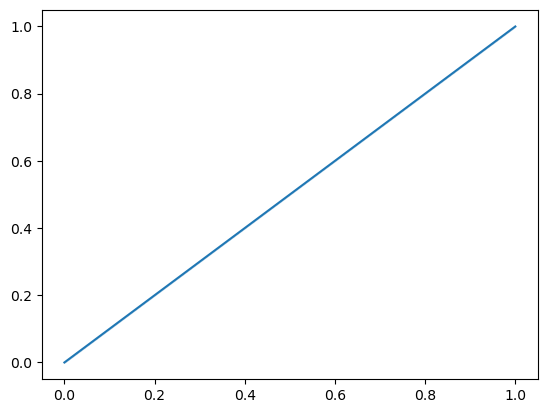

In [242]:
sns.lineplot(y=pred,x=Y_test)

In [234]:
from sklearn import metrics

In [235]:
metrics.mean_absolute_error(Y_test,pred)

1.3280570942531997e-14

In [236]:
metrics.mean_squared_error(Y_test,pred)

5.247820152843834e-28